In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

- carregando e tratando base

In [2]:
dados = pd.read_csv('pokemon.csv')
dados.head()

,pokemon_id,pokemon_name,base_attack,base_defense,base_stamina,type,rarity,charged_moves,fast_moves,candy_required,...,base_flee_rate,dodge_probability,max_pokemon_action_frequency,min_pokemon_action_frequency,found_egg,found_evolution,found_wild,found_research,found_raid,found_photobomb
0,1,Bulbasaur,118,111,128,"['Grass', 'Poison']",Standard,"['Sludge Bomb', 'Seed Bomb', 'Power Whip']","['Vine Whip', 'Tackle']",NaN,...,-1.0,0.15,1.6,0.2,True,False,True,True,True,True
1,2,Ivysaur,151,143,155,"['Grass', 'Poison']",Standard,"['Sludge Bomb', 'Solar Beam', 'Power Whip']","['Razor Leaf', 'Vine Whip']",25.0,...,-1.0,0.15,1.6,0.2,False,True,True,True,True,True
2,3,Venusaur,198,189,190,"['Grass', 'Poison']",Standard,"['Sludge Bomb', 'Petal Blizzard', 'Solar Beam']","['Razor Leaf', 'Vine Whip']",100.0,...,-1.0,0.15,1.6,0.2,False,True,True,True,True,True
3,4,Charmander,116,93,118,['Fire'],Standard,"['Flame Charge', 'Flame Burst', 'Flamethrower']","['Ember', 'Scratch']",NaN,...,-1.0,0.15,1.6,0.2,True,False,True,True,True,True
4,5,Charmeleon,158,126,151,['Fire'],Standard,"['Fire Punch', 'Flame Burst', 'Flamethrower']","['Ember', 'Fire Fang']",25.0,...,-1.0,0.15,1.6,0.2,False,True,True,True,True,True


In [3]:
dados['rarity'].unique()

array(['Standard', 'Legendary', 'Mythic', 'Ultra beast'], dtype=object)

In [4]:
dados['found_egg'] = dados.apply(lambda x: 1 if x['found_egg'] == True else 0, axis=1)
dados['found_evolution'] = dados.apply(lambda x: 1 if x['found_evolution'] == True else 0, axis=1)
dados['found_wild'] = dados.apply(lambda x: 1 if x['found_wild'] == True else 0, axis=1)
dados['found_research'] = dados.apply(lambda x: 1 if x['found_research'] == True else 0, axis=1)
dados['found_raid'] = dados.apply(lambda x: 1 if x['found_raid'] == True else 0, axis=1)
dados['found_photobomb'] = dados.apply(lambda x: 1 if x['found_photobomb'] == True else 0, axis=1)
dados['rarity'] = dados.apply(lambda x: 1 if x['rarity'] == "Legendary" else 0, axis =1)


In [5]:
dados.isna().sum()

,0
pokemon_id,0
pokemon_name,0
base_attack,0
base_defense,0
base_stamina,0
type,0
rarity,0
charged_moves,0
fast_moves,0
candy_required,536


In [6]:
dados= dados[['base_attack',	'base_defense', 'base_stamina', 'base_flee_rate',	'dodge_probability',	'max_cp','max_pokemon_action_frequency',	'min_pokemon_action_frequency',	'found_egg',	'found_evolution',	'found_wild',	'found_research',	'found_raid',	'found_photobomb', 'rarity', 'attack_probability', 'base_capture_rate', 'distance']]

dados.dropna(inplace=True)
dados.isna().sum()

<ipython-input-6-fa5fcd90ebee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados.dropna(inplace=True)


,0
base_attack,0
base_defense,0
base_stamina,0
base_flee_rate,0
dodge_probability,0
max_cp,0
max_pokemon_action_frequency,0
min_pokemon_action_frequency,0
found_egg,0
found_evolution,0


- iniciando modelos

- dt e rf com gridsearch

In [7]:
# separando X e Y
x = dados.drop('rarity', axis=1)
y = dados['rarity']

In [8]:
dados.head()

,base_attack,base_defense,base_stamina,base_flee_rate,dodge_probability,max_cp,max_pokemon_action_frequency,min_pokemon_action_frequency,found_egg,found_evolution,found_wild,found_research,found_raid,found_photobomb,rarity,attack_probability,base_capture_rate,distance
0,118,111,128,-1.0,0.15,1275,1.6,0.2,1,0,1,1,1,1,0,0.1,-1.0,3
1,151,143,155,-1.0,0.15,1943,1.6,0.2,0,1,1,1,1,1,0,0.1,-1.0,3
2,198,189,190,-1.0,0.15,3112,1.6,0.2,0,1,1,1,1,1,0,0.2,-1.0,3
3,116,93,118,-1.0,0.15,1121,1.6,0.2,1,0,1,1,1,1,0,0.1,-1.0,3
4,158,126,151,-1.0,0.15,1891,1.6,0.2,0,1,1,1,1,1,0,0.1,-1.0,3


In [9]:
# separando treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [10]:
# configurando parametros DT treino
params = {
  'random_state':[True],
  'criterion': ['log_loss','gini'],
  'max_depth': range(1,16),
  'min_samples_leaf': range(1,6),
}

gs = GridSearchCV(DecisionTreeClassifier(), param_grid=params, scoring='accuracy')
gs.fit(x_train, y_train)
print(gs.score(x_train, y_train))
print(gs.best_params_)
print(gs.best_estimator_)
best_estimator = gs.best_estimator_

0.9941002949852508
{'criterion': 'log_loss', 'max_depth': 5, 'min_samples_leaf': 2, 'random_state': True}
DecisionTreeClassifier(criterion='log_loss', max_depth=5, min_samples_leaf=2,
                       random_state=True)


In [11]:
# jogando para teste
modelo = DecisionTreeClassifier(criterion='log_loss', max_depth= 5, min_samples_leaf=2, random_state=True)
modelo.fit(x_train, y_train)
y_pred = modelo.predict(x_test)
print("acurácia: ", metrics.accuracy_score(y_test, y_pred))

acurácia:  0.9778761061946902


In [12]:
# matriz de confusão

<Axes: >

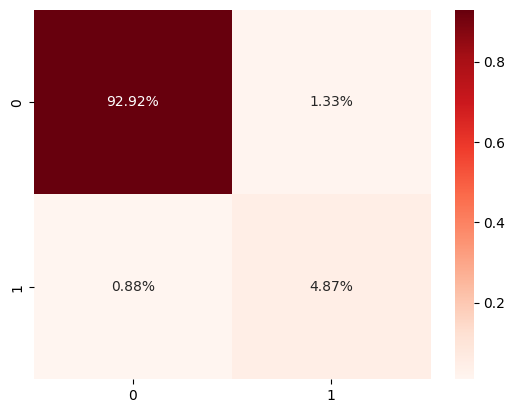

In [13]:
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix/np.sum(matrix), annot=True, fmt='.2%', cmap='Reds')

- RF

In [14]:
# configurando parametros RF treino
params = {
  'random_state':[True],
  'n_estimators': [10,30],
  'max_depth': range(1,11)
}

gs = GridSearchCV(RandomForestClassifier(), param_grid=params, scoring='accuracy')
gs.fit(x_train, y_train)
print(gs.score(x_train, y_train))
print(gs.best_params_)
best_estimator = gs.best_estimator_

0.9941002949852508
{'max_depth': 5, 'n_estimators': 30, 'random_state': True}


In [15]:
clf = RandomForestClassifier(criterion = "gini", n_estimators=30, random_state=True, max_depth=5)
clf.fit(x_train, y_train.values.ravel())
y_pred = clf.predict(x_test)
print("acurácia:" , metrics.accuracy_score(y_test, y_pred))

acurácia: 0.9867256637168141


<Axes: >

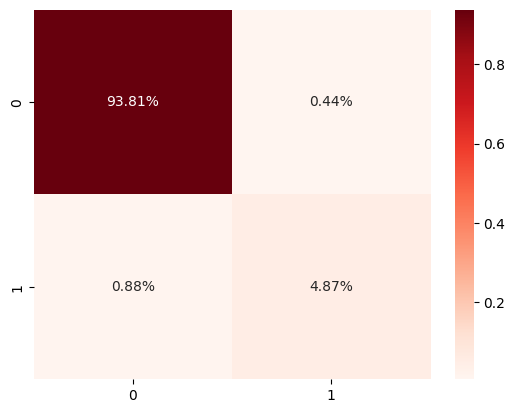

In [16]:
# matriz de confusão
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix/np.sum(matrix), annot=True, fmt='.2%', cmap='Reds')

- QDA e LDA

In [17]:
# normalizando os dados
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [18]:
# configurando parametros LDA LSQR
params = {
  'solver' : ['lsqr'],
  'shrinkage' : [0, 1]
}

gs = GridSearchCV(LinearDiscriminantAnalysis(), param_grid=params, scoring='accuracy')
gs.fit(x_train, y_train)
print(gs.score(x_train, y_train))
print(gs.best_params_)
best_estimator = gs.best_estimator_

0.9660766961651918
{'shrinkage': 0, 'solver': 'lsqr'}


In [19]:
model = LinearDiscriminantAnalysis(n_components=1, solver='lsqr', shrinkage= 0) # Singular Value Decomposition: mais features, melhor
model.fit(x_test, y_test)
Y_prev = model.predict(x_test)
print("Acurácia lsqr: " , accuracy_score(y_test, Y_prev))

Acurácia lsqr:  0.9646017699115044


In [20]:
# LDA SVD
model = LinearDiscriminantAnalysis(n_components=1, solver='svd') # Singular Value Decomposition: mais features, melhor
model.fit(x_train, y_train)
y_prev = model.predict(x_train)
print("Acurácia svd: " , accuracy_score(y_train, y_prev))

Acurácia svd:  0.9660766961651918


In [21]:
model = LinearDiscriminantAnalysis(n_components=1, solver='svd') # Singular Value Decomposition: mais features, melhor
model.fit(x_test, y_test)
y_prev = model.predict(x_test)
print("Acurácia svd: " , accuracy_score(y_test, y_prev))

Acurácia svd:  0.9646017699115044


In [22]:
# Quadratic = QDA
model = QuadraticDiscriminantAnalysis()
model.fit(x_train, y_train)
y_prev = model.predict(x_train)
print("Acurácia QDA: " , accuracy_score(y_train, y_prev))

Acurácia QDA:  0.9351032448377581


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:960: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:960: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:963: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])


In [23]:
model = QuadraticDiscriminantAnalysis()
model.fit(x_test, y_test)
y_prev = model.predict(x_test)
print("Acurácia QDA: " , accuracy_score(y_test, y_prev))

Acurácia QDA:  0.9424778761061947


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:960: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:960: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:963: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
